# PA005: HIGH VALUE CUSTOMER INDETIFICATION (INSIDERS)

# 0.0 Planejamento da solução (IOT)

## Input

    1. Problema de negócio
        -> selecionar os clientes mais valiosos para integrar a um programa de fidelização

    2. Conjunto de dados
        -> Vendas de um e-commerce online durante o período de um ano

## Output

    A indicação das pessoas que darão parte do programa insiders

    -> Relatório com as respostas das perguntas do negócio

            1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
            2. Quantos clientes farão parte do grupo?
            3. Quais as principais características desses clientes?
            4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
            5. Qual a expectativa de faturamento desse grupo para os próximos meses?
            6. Quais as condições para uma pessoa ser elegível ao Insiders?
            7. Quais as condições para uma pessoa ser removida do Insiders?
            8. Qual a garantia que o programa Insiders é melhor que o restante da base?
            9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks

    1 - Quem são as pessoas elegíveis para participar do programa de Insiders?

    2 - O que é seer elegível? O que são clientes de maior valor?
        -> em relação a faturamento
            -> alto ticket médio (quanto o cliente gastou na média com a empresa)
            -> alto LVT (soma do quanto o cliente gastou com a empresa)
            -> baixa recência (tempo da última compra do cliente)
            -> alto basket size (tamanho da cesta de compra)
            -> baixa probabilidade de churn (período em que a pessoa parou de comprar com a empresa)
            -> alta propensão de compra (probabilidade de uma cliente em realizar uma nova compra)
        -> em relação a custo
            -> baixa taxa de devolução 
            -> em relação a experiência de compra
            -> média alta das avaliações

    3 - Quantos clientes farão parte do grupo?
        -> Com o número total de clientes vou fazer a porcentagem dos inseders

    4 - Quais as principais características desses clientes?
        -> Escrever as características do cliente
            -> Idade
            -> Localização
        -> Escrever cracterísticas do hábito de consumo
            -> Atributos da clusterização

    5 - Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
        -> Calcular o faturamento total do ano
        -> Calcular o faturamento do grupo
        -> Ver o quanto o grupo está em relação a esse faturamento

    6 -Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
        -> Calcular o faturamento total do ano
        -> Calcular o faturamento do grupo 
        -> Ver o quanto o grupo está em relação a esse faturamento

    7 -Qual a expectativa de faturamento desse grupo para os próximos meses?
        -> LTV do grupo insiders - está ligada com metas
        -> Análise de Cohort (análise onde você marca a pessoa no tempo/produto/compra)

    8 - Quais as condições para uma pessoa ser elegível ao Insiders?
        -> Definir a periodicidade do modelo (1 mes, 3 meses?)
        -> A pessoa precisa ser similar com uma pessoa do grupo

    9 - Quais as condições para uma pessoa ser removida do Insiders ?
        -> Definir a periodicidade do modelo (1 mes, 3 meses?) 
        -> A pessoa precisa ser dissimilar com uma pessoa do grupo

    10 - Qual a garantia que o programa Insiders é melhor que o restante da base ?
        -> Teste A/BTeste
        -> A/B beyesiano
        -> Teste de hipótese

    11 - Quais ações o time de marketing pode realizar para aumentar o faturamento?
        -> desconto 
        -> preferencia de compra
        -> frete
        -> visita 

passo 1: ordenar os clientes por recency

passo 2: dividir a base de clientes de acordo com as notas 

passo 3: ordenar pela frequency

passo 4: dar as notas 

passo 5: ordenar os clientes por monetary

passo 6: dar as notas

passo 7: calcular a média das notas para R, F, M

 <font color='blue'> # Step 0 - Imports <\font>

#   0.0. Imports

 ## 0.1. Imports

In [28]:
import numpy      as np
import pandas     as pd
import seaborn    as sns
import inflection

from matplotlib            import pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML
from sklearn               import cluster as c
from sklearn               import metrics as m
from plotly                import express as px


## 0.2. Helper Functions

In [29]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.rcParams['font.size'] = 25
    
    display(HTML( '<style>.container {width:100% !important;}</style>'))
    #pd.options.display.max_columns = None
    #pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
            
    sns.set()

In [30]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1.0 - Data Description

##  1.1. Load dataset

In [31]:
# read data
df_raw = pd.read_csv('C:/Users/DML1WFE/repos/projects/pa005_insiders_clustering/insiders_clustering/data/raw/Ecommerce.csv', encoding='unicode_escape', low_memory=False)

# drop extra column
df_raw = df_raw.drop(['Unnamed: 8'], axis = 1)

##  1.2. Rename Columns

In [32]:
df1 = df_raw

In [33]:
cols_old = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

#rename

df1.columns = cols_new
df1


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France


##  1.3. Data Dimensions

In [34]:
print('Number od rows: {} '.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number od rows: 541909 
Number of columns: 8


## 1.4. Data Types

In [35]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

##  1.5. Check NA

In [36]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

##  1.6. Fillout NA

In [37]:
# drop NA
df1 = df1.dropna(subset=('description', 'customer_id'))
print('removed data: {:.0f}%'.format((df_raw.shape[0] - df1.shape[0])/df_raw.shape[0]*100))

removed data: 25%


##  1.7. Chage dtypes

In [38]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'],format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int64)

C:\Users\DML1WFE\AppData\Local\Temp/ipykernel_6536/3202911936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['invoice_date'] = pd.to_datetime(df1['invoice_date'],format='%d-%b-%y')
C:\Users\DML1WFE\AppData\Local\Temp/ipykernel_6536/3202911936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['customer_id'] = df1['customer_id'].astype(int64)


##  1.8. Descriptive Statistical

# 2.0 - Feature Engineering

## 2.1. Data

In [39]:
df2 = df1

## 2.1. Feature Creation

In [40]:
# data refrence
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price','country'], axis = 1).drop_duplicates(ignore_index=True)

# Gross Revenue
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Recency
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency,on='customer_id', how='left')

# Frequency
df_freq= df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

C:\Users\DML1WFE\AppData\Local\Temp/ipykernel_6536/895134331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gross_revenue'] = df2['quantity'] * df2['unit_price']


#  3.0 - Filtering Feature

In [41]:
df3 = df_ref

#  4.0 - Exploratory Data Analysis - EDA

In [42]:
df4 = df3

#  5.0 - Data Preparation

In [43]:
df5 = df4

#  6.0 - Feature Selection

In [44]:
df6 = df5

#  7.0 - Hyperparameter Fine-tunning

In [45]:
X = df6.drop(columns=['customer_id'])

In [46]:
clusters = [2, 3, 4, 5, 6]

## 7.1 Within-Cluster Sum of Square (WSS)

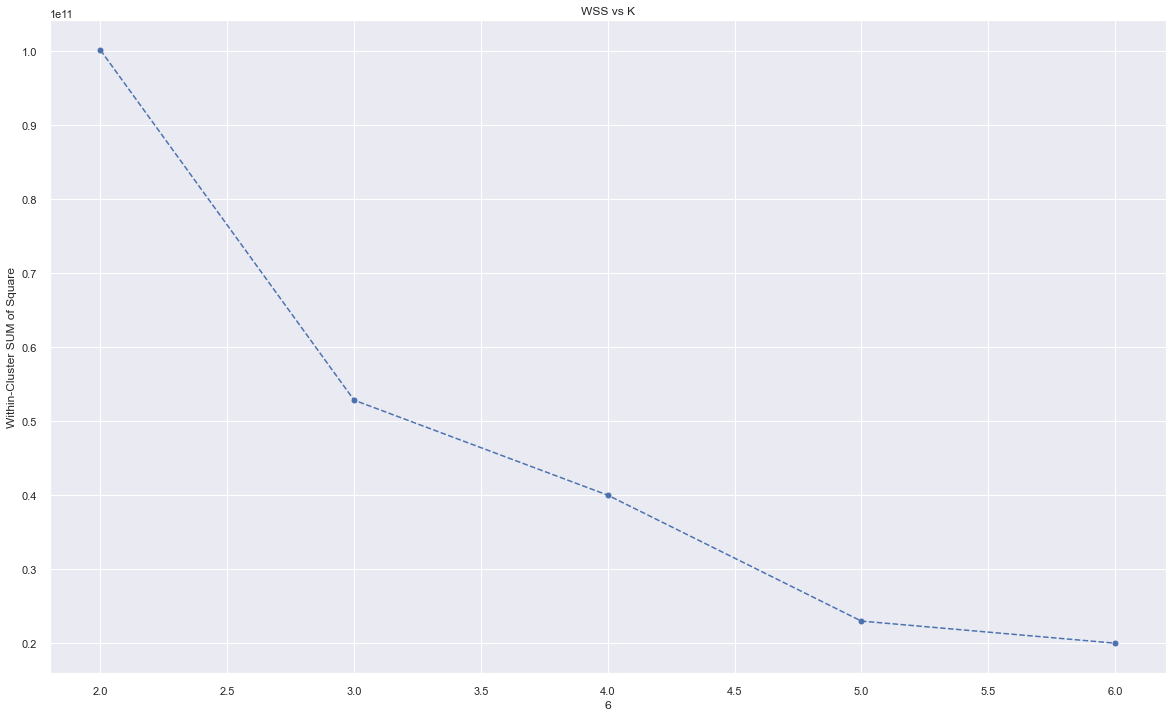

In [47]:
wss = []
for k in clusters:
    # model definiton
    kmeans = c.KMeans (init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_) 

# plot wss - Elbow Method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel(k);
plt.ylabel('Within-Cluster SUM of Square');
plt.title('WSS vs K');

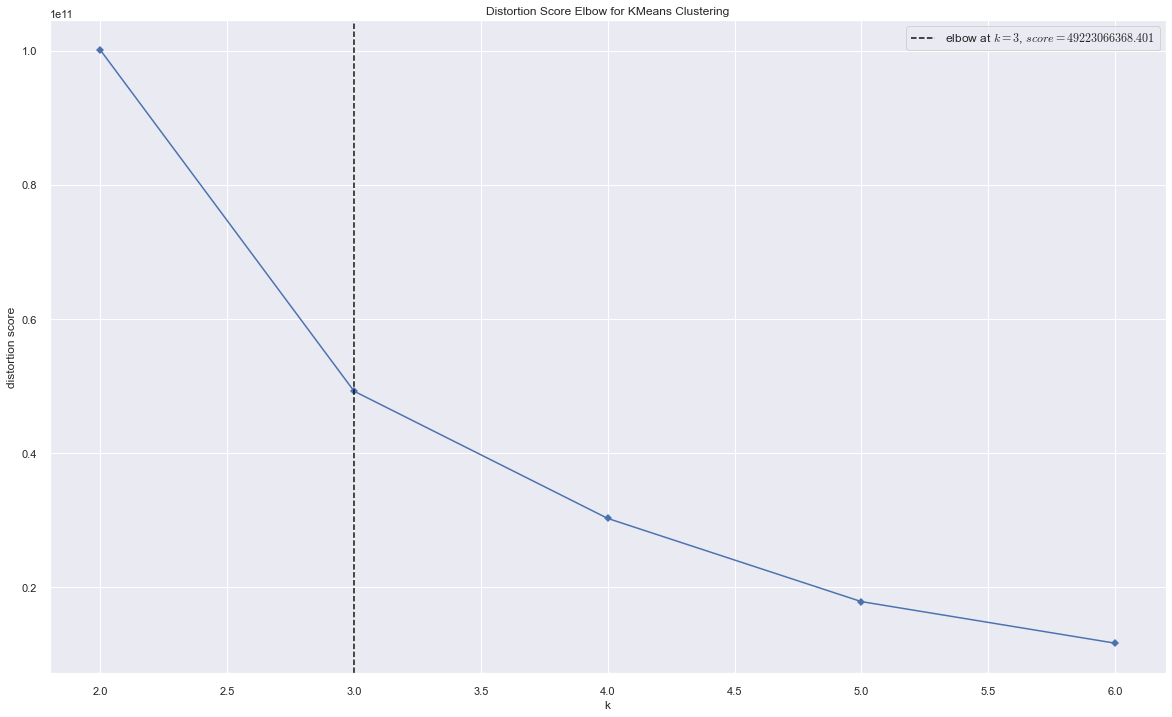

In [48]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## 7.1 Sillhouette Score

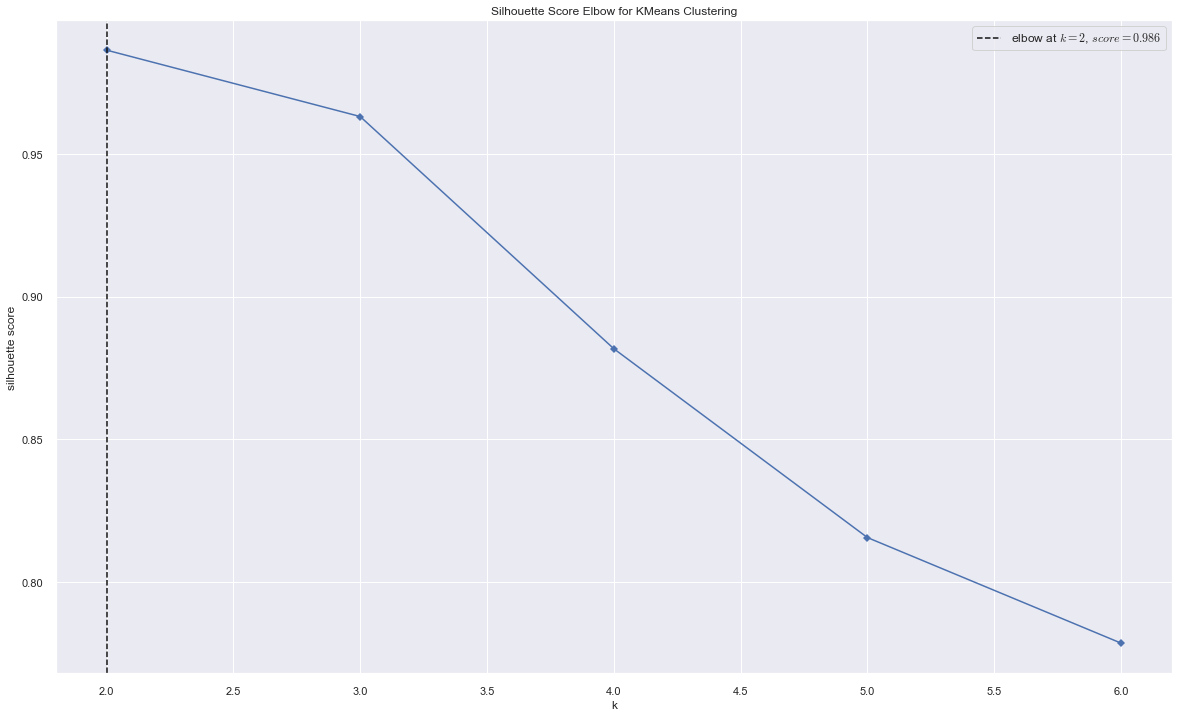

In [49]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show();

#  8.0 - Model Training

## 8.1 - K-Means

In [50]:
# model definition
k = 3
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 8.2 - Cluster Validation

In [51]:
## WSS (within Cluster sum of square)
print('WSS value: {}'. format(kmeans.inertia_))

## SS (Silhoutte Score) 
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 52830442008.00697
SS value: 0.9494677566681542


#  9.0 - Cluster Analysis

In [52]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


## 9.1 - Visualization Inspection

In [54]:
fig = px.scatter_3d(df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
fig.show()

## 9.1 - Cluster Profile

In [ ]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['prec_customer'] = (df_cluster['customer_id'] / df_cluster['customer_id'].sum())*100

# Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Average Recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Average invoice_no
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')


df_cluster

,cluster,customer_id,prec_customer,gross_revenue,recency_days,invoice_no
0,0,4335,99.153705,1372.577826,92.257901,4.614533
1,1,6,0.137237,182181.981667,7.166667,89.000000
2,2,31,0.709058,40543.517742,13.290323,53.290323


Cluster 01: (candidato a insider)

    * número de customers : 6 (0,14% do customers)
    * Recência média: 7 dias
    * Compras média: 89 compras
    * Receita média: $182.182,00 USD

Cluster 02:

    * número de customers : 6 (0,70% do customers)
    * Recência média: 14 dias
    * Compras média: 53 compras
    * Receita média: $40.543,52 USD

Cluster 03:

    * número de customers : 4.335 (99% do customers)
    * Recência média: 92 dias
    * Compras média: 5 compras
    * Receita média: $1.372,57 USD

In [55]:
! pip freeze

anyio @ file:///C:/ci/anyio_1620153135622/work/dist
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bleach @ file:///tmp/build/80754af9/bleach_1628110601003/work
brotlipy==0.7.0
certifi==2021.10.8
cffi @ file:///C:/ci/cffi_1625831756778/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
cryptography @ file:///C:/ci/cryptography_1635366712888/work
cycler==0.11.0
debugpy @ file:///C:/ci/debugpy_1629222819322/work
decorator @ file:///tmp/build/80754af9/decorator_1632776554403/work
defusedxml @ file:///tmp/build/80754af9/defusedxml_1615228127516/work
entrypoints==0.3
idna @ file:///tmp/build/80754af9/idna_16226543

# 10.0 - Deploy to Production